# WeatherPy

---

## Maria's work to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        print (city)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
   
        #Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
blackmans bay
Processing Record 2 of Set 1 | prado
prado
Processing Record 3 of Set 1 | port-aux-francais
port-aux-francais
Processing Record 4 of Set 1 | whitehorse
whitehorse
Processing Record 5 of Set 1 | hithadhoo
hithadhoo
Processing Record 6 of Set 1 | anadyr
anadyr
Processing Record 7 of Set 1 | tannum sands
tannum sands
Processing Record 8 of Set 1 | mapimi
mapimi
Processing Record 9 of Set 1 | vorgashor
vorgashor
Processing Record 10 of Set 1 | argo
argo
Processing Record 11 of Set 1 | strelka
strelka
Processing Record 12 of Set 1 | georgetown
georgetown
Processing Record 13 of Set 1 | touros
touros
Processing Record 14 of Set 1 | hamilton
hamilton
Processing Record 15 of Set 1 | didim
didim
Processing Record 16 of Set 1 | susuman
susuman
Processing Record 17 of Set 1 | st. john's
st. john's
Processing Record 18 of Set 1 | sungai penuh
sungai penuh
Processing Record 19 of S

ust-nera
Processing Record 8 of Set 4 | tluszcz
tluszcz
Processing Record 9 of Set 4 | viana do castelo
viana do castelo
Processing Record 10 of Set 4 | mo i rana
mo i rana
Processing Record 11 of Set 4 | morristown
morristown
Processing Record 12 of Set 4 | hilo
hilo
Processing Record 13 of Set 4 | tralee
tralee
Processing Record 14 of Set 4 | longyearbyen
longyearbyen
Processing Record 15 of Set 4 | petropavlovsk-kamchatsky
petropavlovsk-kamchatsky
Processing Record 16 of Set 4 | lubang
lubang
Processing Record 17 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 18 of Set 4 | slave lake
slave lake
Processing Record 19 of Set 4 | utrik
utrik
Processing Record 20 of Set 4 | fayzabad
fayzabad
Processing Record 21 of Set 4 | mantua
mantua
Processing Record 22 of Set 4 | monte carmelo
monte carmelo
Processing Record 23 of Set 4 | myitkyina
myitkyina
Processing Record 24 of Set 4 | lodja
lodja
Processing Record 25 of Set 4 | berdigestyakh
berdigestyakh
Processing Reco

clinton
Processing Record 14 of Set 7 | carnarvon
carnarvon
Processing Record 15 of Set 7 | boston
boston
Processing Record 16 of Set 7 | vilyuchinsk
vilyuchinsk
Processing Record 17 of Set 7 | sabang
sabang
Processing Record 18 of Set 7 | port elizabeth
port elizabeth
Processing Record 19 of Set 7 | san julian
san julian
Processing Record 20 of Set 7 | soe
soe
Processing Record 21 of Set 7 | kloulklubed
kloulklubed
Processing Record 22 of Set 7 | berlin
berlin
Processing Record 23 of Set 7 | crane
crane
Processing Record 24 of Set 7 | tan-tan
tan-tan
Processing Record 25 of Set 7 | izluchinsk
izluchinsk
Processing Record 26 of Set 7 | usogorsk
usogorsk
Processing Record 27 of Set 7 | kanniyakumari
kanniyakumari
Processing Record 28 of Set 7 | mazagao
mazagao
Processing Record 29 of Set 7 | kimovsk
kimovsk
Processing Record 30 of Set 7 | nagato
nagato
Processing Record 31 of Set 7 | ketchikan
ketchikan
Processing Record 32 of Set 7 | emerald
emerald
Processing Record 33 of Set 7 | ball

rotorua
Processing Record 26 of Set 10 | piti village
piti village
Processing Record 27 of Set 10 | espargos
City not found. Skipping...
Processing Record 28 of Set 10 | les avirons
les avirons
Processing Record 29 of Set 10 | cradock
cradock
Processing Record 30 of Set 10 | severnoye
severnoye
Processing Record 31 of Set 10 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 10 | diawara
diawara
Processing Record 33 of Set 10 | vadso
vadso
Processing Record 34 of Set 10 | el bauga
el bauga
Processing Record 35 of Set 10 | gejiu
gejiu
Processing Record 36 of Set 10 | southern pines
southern pines
Processing Record 37 of Set 10 | alofi
alofi
Processing Record 38 of Set 10 | egilsstadir
egilsstadir
Processing Record 39 of Set 10 | holualoa
holualoa
Processing Record 40 of Set 10 | san luis de la loma
san luis de la loma
Processing Record 41 of Set 10 | wodonga
wodonga
Processing Record 42 of Set 10 | illizi
illizi
Processing Record 43 of Set 10 | nogliki
nogliki
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,280.11,87,16,0.45,AU,1697570457
1,prado,-17.3411,-39.2208,299.25,69,0,5.35,BR,1697570457
2,port-aux-francais,-49.3500,70.2167,275.32,74,95,8.36,TF,1697570457
3,whitehorse,60.7161,-135.0538,281.58,82,75,2.57,CA,1697570351
4,hithadhoo,-0.6000,73.0833,300.60,76,8,6.49,MV,1697570457


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,280.11,87,16,0.45,AU,1697570457
1,prado,-17.3411,-39.2208,299.25,69,0,5.35,BR,1697570457
2,port-aux-francais,-49.3500,70.2167,275.32,74,95,8.36,TF,1697570457
3,whitehorse,60.7161,-135.0538,281.58,82,75,2.57,CA,1697570351
4,hithadhoo,-0.6000,73.0833,300.60,76,8,6.49,MV,1697570457


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

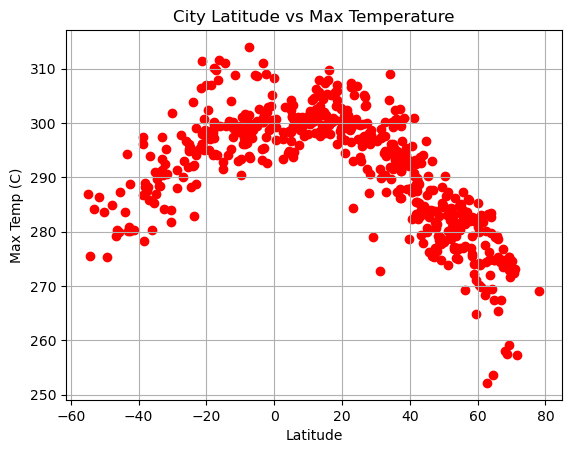

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = 'r')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

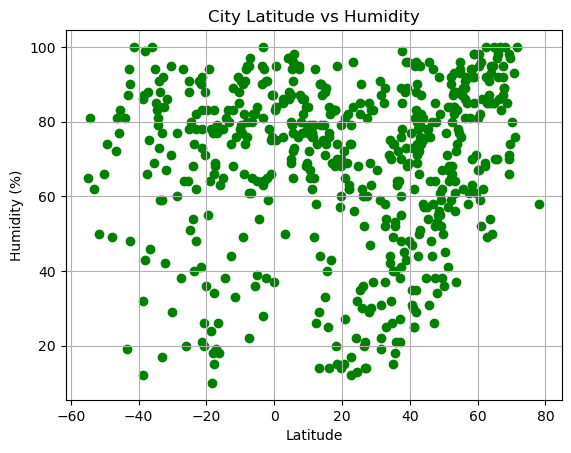

In [11]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o",color ='g')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

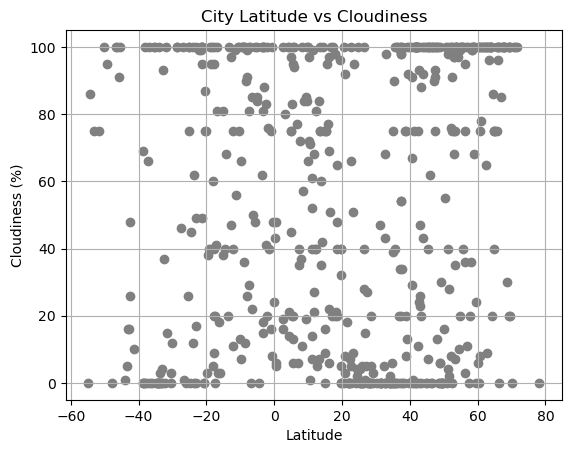

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o",color = "gray")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

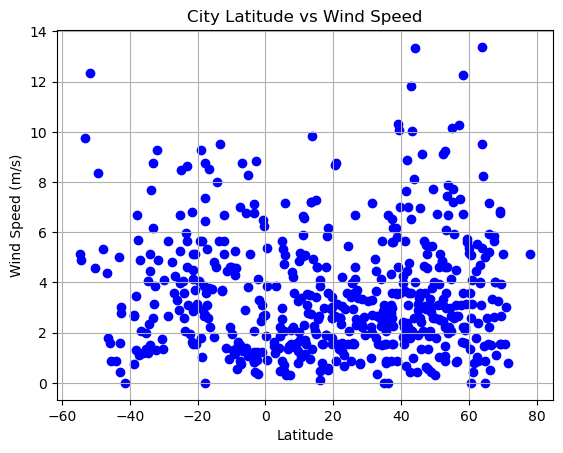

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o",color = 'b')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# create a function to repeat the linear regression scatter plots below

def my_scatter(df, x_col_name, y_col_name, hemi_name): #these are parameters
    x =df[x_col_name]
    y =df[y_col_name]
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    res = linregress(x, y)
    print(f"R-squared: {res.rvalue**2:.6f}")
    plt.plot(x, y, 'o')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    #label regression line with linear equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(250, 20),fontsize=15,color="red")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,whitehorse,60.7161,-135.0538,281.58,82,75,2.57,CA,1697570351
5,anadyr,64.7500,177.4833,267.43,100,40,5.00,RU,1697570458
7,mapimi,25.8167,-103.8500,295.81,30,0,2.96,MX,1697570458
8,vorgashor,67.5833,63.9500,274.71,92,100,2.62,RU,1697570458
9,argo,37.6333,22.7333,291.92,85,34,2.26,GR,1697570458


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,280.11,87,16,0.45,AU,1697570457
1,prado,-17.3411,-39.2208,299.25,69,0,5.35,BR,1697570457
2,port-aux-francais,-49.3500,70.2167,275.32,74,95,8.36,TF,1697570457
4,hithadhoo,-0.6000,73.0833,300.60,76,8,6.49,MV,1697570457
6,tannum sands,-23.9504,151.3693,292.09,68,12,2.57,AU,1697570458


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.735310


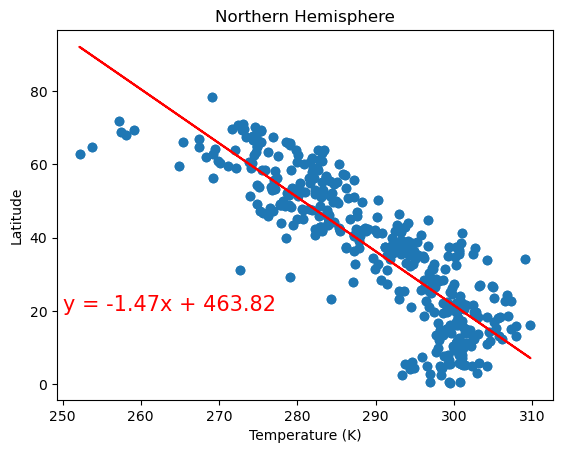

In [27]:
# Run function to plot the Linear regression on Northern Hemisphere
plt.title('Northern Hemisphere')
plt.xlabel('Temperature (K)')
plt.ylabel('Latitude')
my_scatter(northern_hemi_df, "Max Temp", "Lat", "Northern")

R-squared: 0.529293


Text(290, -50, 'y = 1.32x + -410.14')

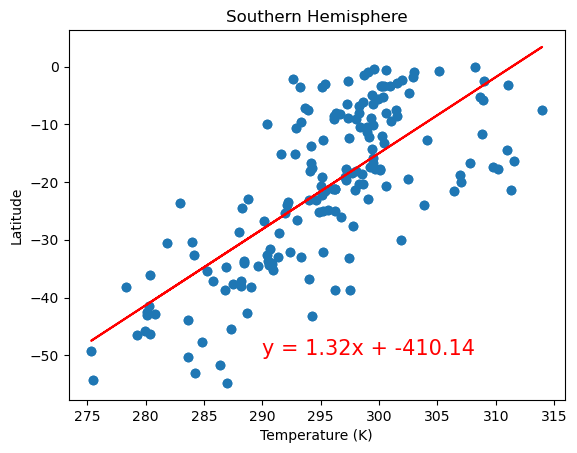

In [28]:
# Linear regression on Southern Hemisphere
# function my_scatter(southern_hemi_df, "Max Temp", "Lat", "Southern")
x = southern_hemi_df["Max Temp"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Temperature (K)')
plt.ylabel('Latitude')
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(290, -50),fontsize=15,color="red")

**Discussion about the linear relationship:Although the northern hemisphere has a tighter correlation, there is a fairly predictable correlation between Temperature and Latitude, as it trends cooler as the cities move futher from the equation (latitude 0). 

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.021531


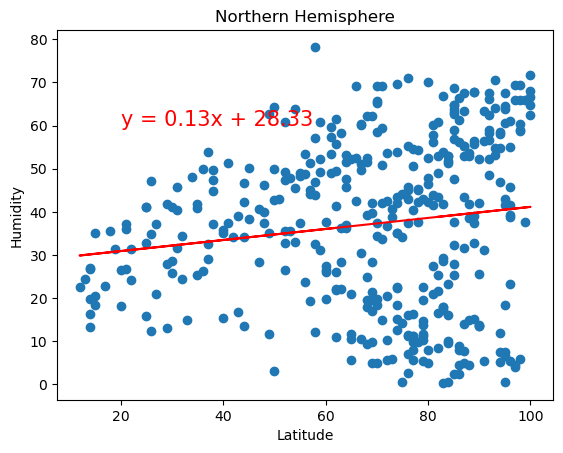

In [20]:
# Northern Hemisphere
x = northern_hemi_df["Humidity"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#my_scatter(northern_hemi_df, "Humidity", "Lat", "Northern")
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.show()

R-squared: 0.000335


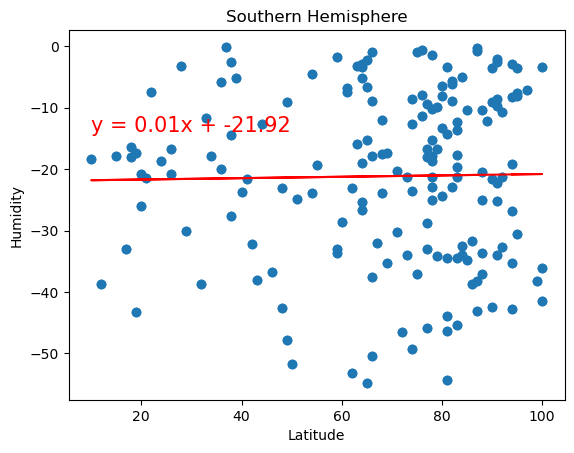

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Humidity"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10, -14),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.055564


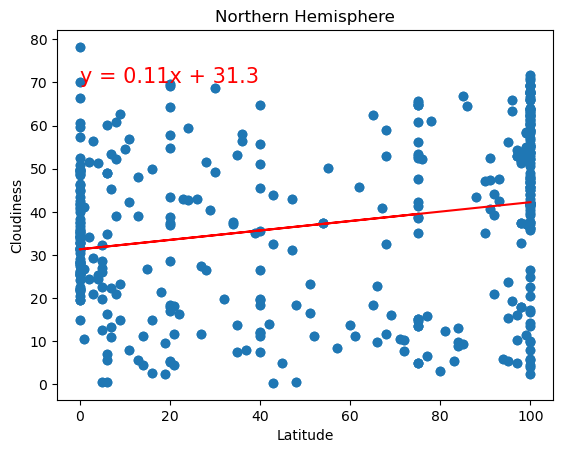

In [24]:
# Northern Hemisphere
x = northern_hemi_df["Cloudiness"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, 70),fontsize=15,color="red")
plt.show()

In [ ]:
# Southern Hemisphere
x = southern_hemi_df["Cloudiness"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, -50),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Not much correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.028873


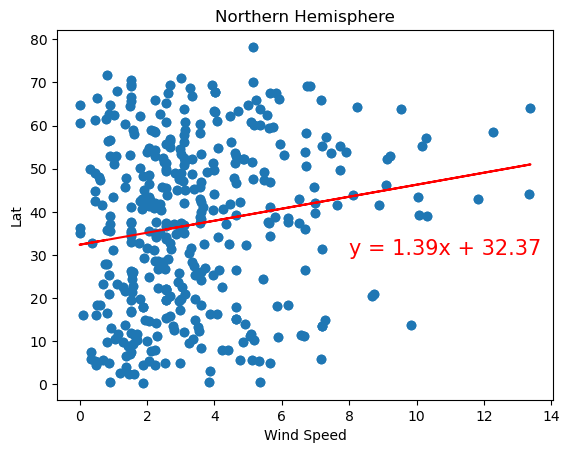

In [25]:
# Northern Hemisphere
x = northern_hemi_df["Wind Speed"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8, 30),fontsize=15,color="red")
plt.show()

R-squared: 0.009013


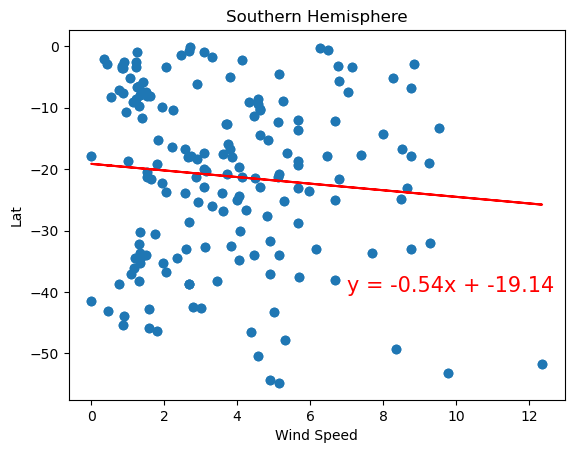

In [26]:
# Southern Hemisphere
x = southern_hemi_df["Wind Speed"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(7, -40),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There is not a significant enought linear relationship to discuss them as relevant predictors of WindSpeed as it related to the regional latitude of each city